Write programs in Python using NumPy library to do the following:
a. Compute the mean, standard deviation, and variance of a two-dimensional random integer array along the second axis.
b. Create a 2-dimensional array of size m x n integer elements, also print the shape, type, and data type of the array, and then reshape it into an n x m array, where n and m are user inputs given at the run time.
c. Test whether the elements of a given 1D array are zero, non-zero, and NaN. Record the indices of these elements in three separate arrays.
d. Create three random arrays of the same size: Array1, Array2, and Array3. Subtract Array 2 from Array3 and store in Array4. Create another array Array5 having two times the values in Array1. Find the Covariance and Correlation of Array1 with Array4 and Array5 respectively.
e. Create two random arrays of the same size 10: Array1, and Array2. Find the sum of the first half of both the arrays and the product of the second half of both arrays.

In [125]:
import numpy as np
#e
Array1 = np.random.randint(0,10,size=10)
Array2 = np.random.randint(0,10,size=10)
sum_of_first_half = Array1[:5]+Array2[:5]
prod_of_second_half = Array1[5:]*Array2[5:]

#d
Array3 = np.random.randint(0,10,size=10)
Array4 = Array3 - Array2
Array5 = Array1*2
covar_of_arr1_with_arr4 = np.cov(Array1,Array4)
covar_of_arr1_with_arr5 = np.cov(Array1,Array5)
corr_of_arr1_with_arr4 = np.corrcoef(Array1, Array4)
corr_of_arr1_with_arr5 = np.corrcoef(Array1, Array5)

#c
oneDArr = np.array([2,3,0,np.nan,2,0,np.nan])
zero = np.where(oneDArr == 0)
non_zero = np.where(oneDArr > 0)
Nan = np.where(np.isnan(oneDArr))

#b.
m = 8
n = 3
arraymn = np.random.randint(0,100, size=(m*n)).reshape(m,n)
arraymn.reshape(n,m)

# a.
array_2d = np.random.randint(0, 10, size=(3, 4))
mean = np.mean(array_2d, axis=1)
std_dev = np.std(array_2d, axis=1)
variance = np.var(array_2d, axis=1)



3. 
Create a data frame having at least 3 columns and 50 rows to store numeric data generated using a random function. Replace 10% of the values with null values whose index positions are generated using a random function. Do the following:
a. Identify and count missing values in a data frame.
b. Drop the column having more than 5 null values.
c. Identify the row label having a maximum of the sum of all values in a row and drop that row.
d. Sort the data frame based on the first column.
e. Remove all duplicates from the first column.
f. Find the correlation between first and second column and the covariance between second and third column.
g. Discretize the second column and create 5 bins.

In [3]:
import pandas as pd
import numpy as np

item_id = np.random.randint(0,100,size=50)
customer_id=np.random.randint(100,200,size=50)
customer_contac=np.random.randint(1000000000,10000000000,size=50,dtype='int64')
random_nulls = np.random.randint(0,51,size=10)
df = pd.DataFrame({
    'item_id' : item_id,
    'customer_id':customer_id,
    'customer_contac':customer_contac
})

print(1,df)
for i in range(5):
    df.at[np.random.randint(0,51), 'item_id'] = np.NaN
    df.at[np.random.randint(0,51), 'customer_id'] = np.NaN
    df.at[np.random.randint(0,51), 'customer_contac'] = np.NaN

#a
missing_values_count = df.isnull().sum()

#b
columns_to_drop = missing_values_count[missing_values_count > 5].index
df = df.drop(columns=columns_to_drop)

#c
sum_of_allvalues_in_a_row = df.sum(axis=1)
index_of_max_col = sum_of_allvalues_in_a_row.index[sum_of_allvalues_in_a_row==sum_of_allvalues_in_a_row.max()][0]

#d
df = df.sort_values(by='item_id')

#e
df = df.drop_duplicates(subset='item_id')

#f
corr_12 = df['item_id'].corr(df['customer_id'])
cov_23 = df['customer_id'].cov(df['customer_contac'])

#g
df['B_discretized'] = pd.cut(df['customer_id'], bins=5)




1     item_id  customer_id  customer_contac
0         6          101       8399422438
1         1          125       7163421774
2        17          127       3500227951
3        30          134       4105133807
4         2          144       6253384181
5        75          182       6652859375
6        20          165       8607604327
7        48          191       5516075530
8        28          154       4947041119
9        58          179       7196755335
10       72          100       5326653197
11       70          119       1792099000
12       34          107       8896704337
13        3          168       6332521290
14       64          186       3255683597
15        2          120       4776022355
16       76          157       7741451422
17       20          101       3926167761
18       39          179       1879433534
19       13          133       7806862165
20       90          177       3828858150
21       37          102       5920436347
22       68          136       7

4. Consider two excel files having attendance of two workshos. Each file has three fields ‘Name’, ‘Date, duration
(in minutes) where names are unique within a file. Note that duration may take one of three values (30, 40, 50)
only. Import the data into two data frames and do the following:
a. Perform merging of the two data frames to find the names of students who had attended both
workshops.
b. Find names of all students who have attended a single workshop only.
c. Merge two data frames row-wise and find the total number of records in the data frame.
d. Merge two data frames row-wise and use two columns viz. names and dates as multi-row indexes.
Generate descriptive statistics for this hierarchical data frame

In [ ]:
import pandas as pd
work1 = pd.read_excel('Book1.xlsx')
work2 = pd.read_excel('book2.xlsx')

#1
merged_df = pd.merge(work1, work2, on="name", how="outer", suffixes=('_1', '_2'))
whoAttentedBoth = pd.merge(work1,work2, on='name') #using inner join
print(whoAttentedBoth)

#2
whoAttentedone=merged_df[merged_df['date_1'].isnull() ^ merged_df['date_2'].isnull()]
print(whoAttentedone)

#3
roWiseMerged = pd.concat([work1,work2],ignore_index=True)
totalNumberOfRecords = len(roWiseMerged)
totalNumberOfRecords

#4
roWiseMerged = roWiseMerged.stack()
print(roWiseMerged)
roWiseMerged.describe()

Do the following using the PANDAS Series:
a. Create a series with 5 elements. Display the series sorted on index and also sorted on values separately
b. Create a series with N elements with some duplicate values. Find the minimum and maximum ranks assigned to the values using the ‘first’ and ‘max’ methods
c. Display the index value of the minimum and maximum element of a Series

In [13]:
#a
s1 = pd.Series([22,3,4,5,4])
sortedOnIndex = s1.sort_index()
sortedOnValues = s1.sort_values()

#b
s1.rank(method='first')
s1.rank(method='max')

#c
min = s1[s1 == s1.min()].index
max = s1[s1==s1.max()].index



5. Using Iris data, plot the following with proper legend and axis labels: (Download IRIS data from:
https://archive.ics.uci.edu/ml/datasets/iris or import it from sklearn datasets)
a. Plot bar chart to show the frequency of each class label in the data.
b. Draw a scatter plot for Petal width vs sepal width and fit a regression line
c. Plot density distribution for feature petal length.
d. Use a pair plot to show pairwise bivariate distribution in the Iris Dataset.
e. Draw heatmap for the four numeric attributes
f. Compute mean, mode, median, standard deviation, confidence interval and standard error for each
feature
g. Compute correlation coefficients between each pair of features and plot heatmap

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


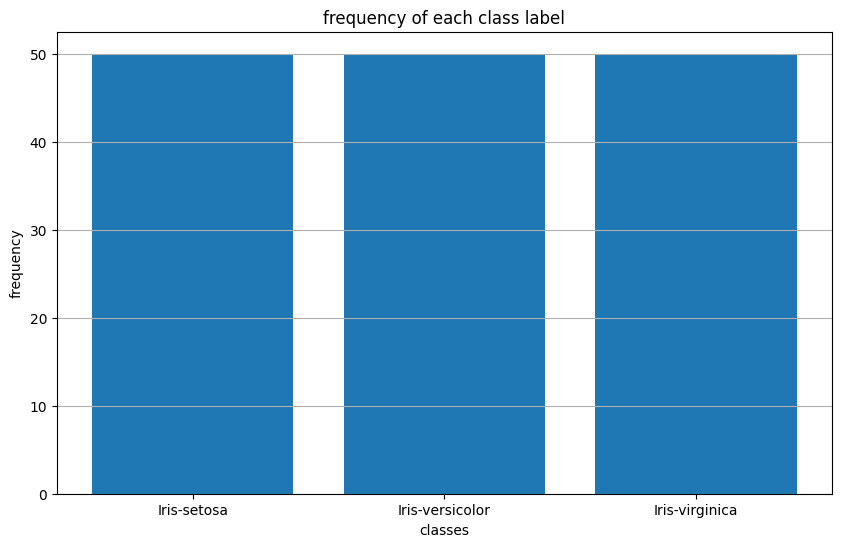

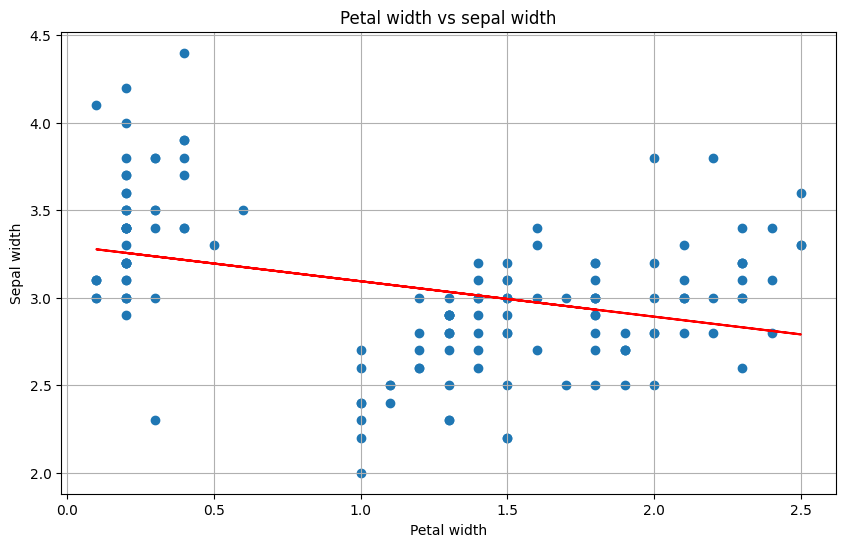

<Figure size 1000x600 with 0 Axes>

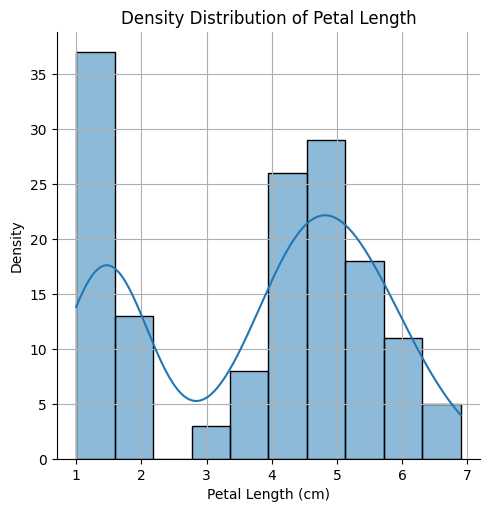

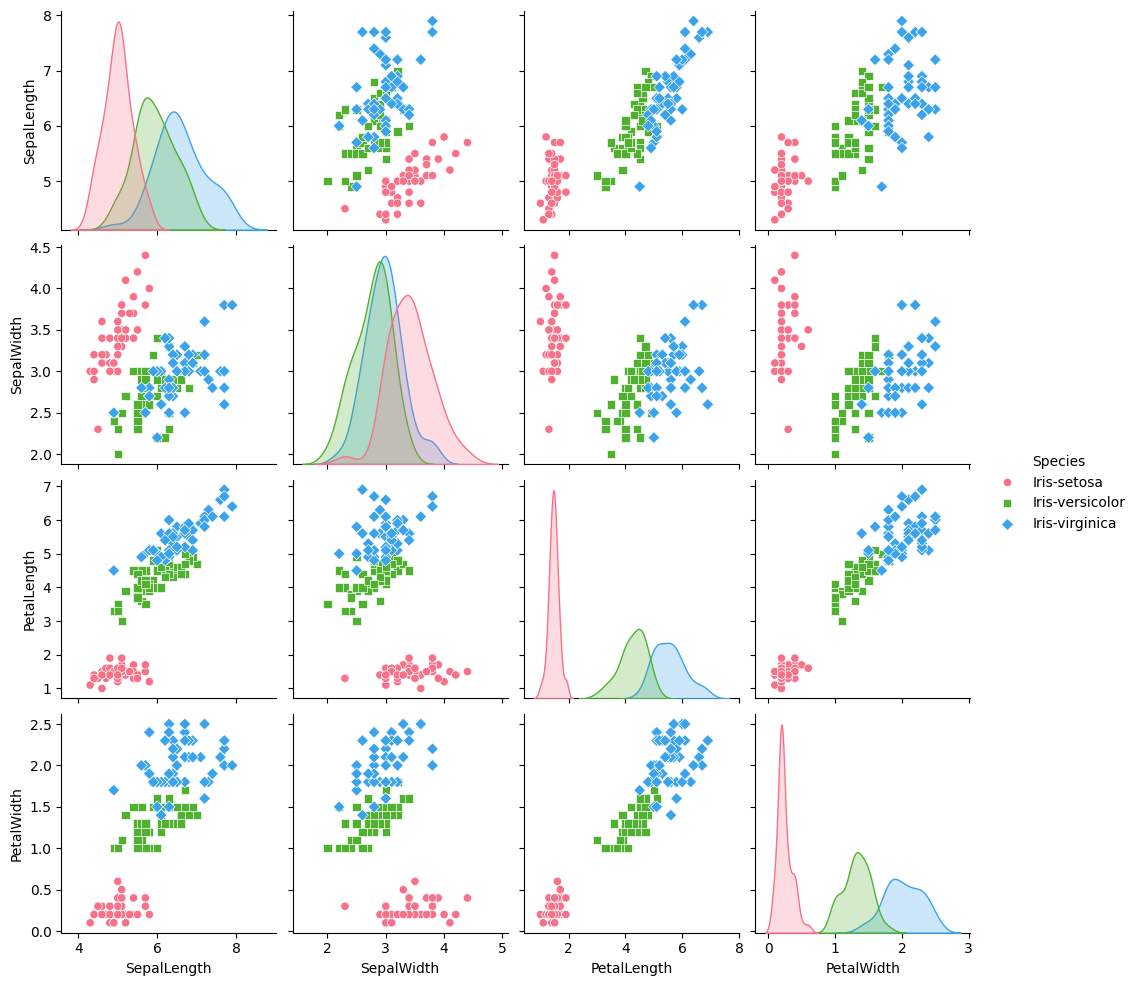

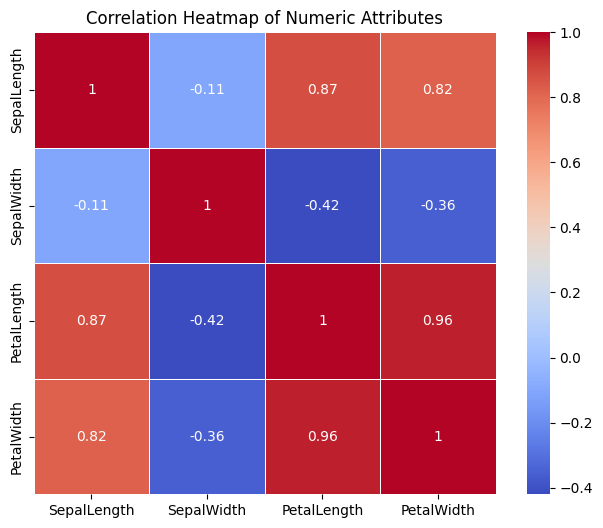

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

iris = pd.read_csv('../iris/iris.data',header=None)
iris.columns = ['SepalLength', 'SepalWidth','PetalLength','PetalWidth','Species']

#a
species = iris['Species'].value_counts()
print(species)
plt.figure(figsize=(10,6))
plt.bar(species.index,species.values)
plt.grid(axis='y')
plt.xlabel('classes')
plt.ylabel('frequency')
plt.title('frequency of each class label')
plt.show()

# #2
coefficients = np.polyfit(iris['PetalWidth'], iris['SepalWidth'], 1)
poly = np.poly1d(coefficients)

plt.figure(figsize=(10,6))
plt.scatter(iris['PetalWidth'], iris['SepalWidth'])
plt.plot(iris['PetalWidth'], poly(iris['PetalWidth']),color='red')
plt.grid()
plt.xlabel('Petal width')
plt.ylabel('Sepal width')
plt.title('Petal width vs sepal width')

# #3.
plt.figure(figsize=(10,6))
sns.displot(iris['PetalLength'],kde=True, bins = 10)
plt.title('Density Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

#4
sns.pairplot(iris, hue='Species', palette='husl', markers=['o', 's', 'D'])
plt.show()

#5
corr_matrix = iris[['SepalLength', 'SepalWidth','PetalLength','PetalWidth']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Attributes')
plt.show()

#6
mean = iris.iloc[:,0:4].mean()
mode = iris.iloc[:,0:4].mode()
median = iris.iloc[:,0:4].median()
std = iris.iloc[:,0:4].std()


6. Consider the following data frame containing a family name, gender of the family member and her/his monthly
income in each record.
Name Gender MonthlyIncome (Rs.)
Shah Male 114000.00
Vats Male 65000.00
Vats Female 43150.00
Kumar Female 69500.00
Vats Female 155000.00
Kumar Male 103000.00
Shah Male 55000.00
Shah Female 112400.00
Kumar Female 81030.00
Vats Male 71900.00
Write a program in Python using Pandas to perform the following:
a. Calculate and display familywise gross monthly income.
b. Calculate and display the member with the highest monthly income.
c. Calculate and display monthly income of all members with income greater than Rs. 60000.00.
d. Calculate and display the average monthly income of the female members


In [87]:
df = pd.read_csv('../data.csv')
print('a. gross monthly income:\n', df.groupby('Name').sum())
print('b. member with highest income: \n',df[df['MonthlyIncome(rs.)'] == df['MonthlyIncome(rs.)'].max()])
print('c. members with income above 60k:\n' ,df[df['MonthlyIncome(rs.)']>60000])
print('d. average income of female members: \n',df[df['Gender']=='Female'].iloc[:,-1].mean())


a. gross monthly income:
                      Gender  MonthlyIncome(rs.)
Name                                           
Kumar      FemaleMaleFemale              253530
Shah         MaleMaleFemale              281400
Vats   MaleFemaleFemaleMale              335050
b. member with highest income: 
    Name  Gender  MonthlyIncome(rs.)
4  Vats  Female              155000
c. members with income above 60k:
     Name  Gender  MonthlyIncome(rs.)
0   Shah    Male              114000
1   Vats    Male               65000
3  Kumar  Female               69500
4   Vats  Female              155000
5  Kumar    Male              103000
7   Shah  Female              112400
8  Kumar  Female               81030
9   Vats    Male               71900
d. average income of female members: 
 92216.0


7. Using Titanic dataset, to do the following:
a. Find total number of passengers with age less than 30
b. Find total fare paid by passengers of first class
c. Compare number of survivors of each passenger class
d. Compute descriptive statistics for any numeric attribute genderwise

In [124]:
titanic = pd.read_csv('../titanic.csv')

a = titanic[titanic['Age']<30]
print(a)

b = titanic[titanic['Pclass'] == 1].loc[:,['Fare']].sum()
print(b)

c = titanic.groupby('Pclass')['Survived'].count()
print(c)

d = titanic.groupby('Sex')['Age'].describe()
print(d)



     PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
7              8         0       3   
8              9         1       3   
9             10         1       2   
..           ...       ...     ...   
883          884         0       2   
884          885         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
..                                                 ...     ...   ... 

0.42